In [883]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt





In [884]:
titanic = pd.read_csv("Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: >

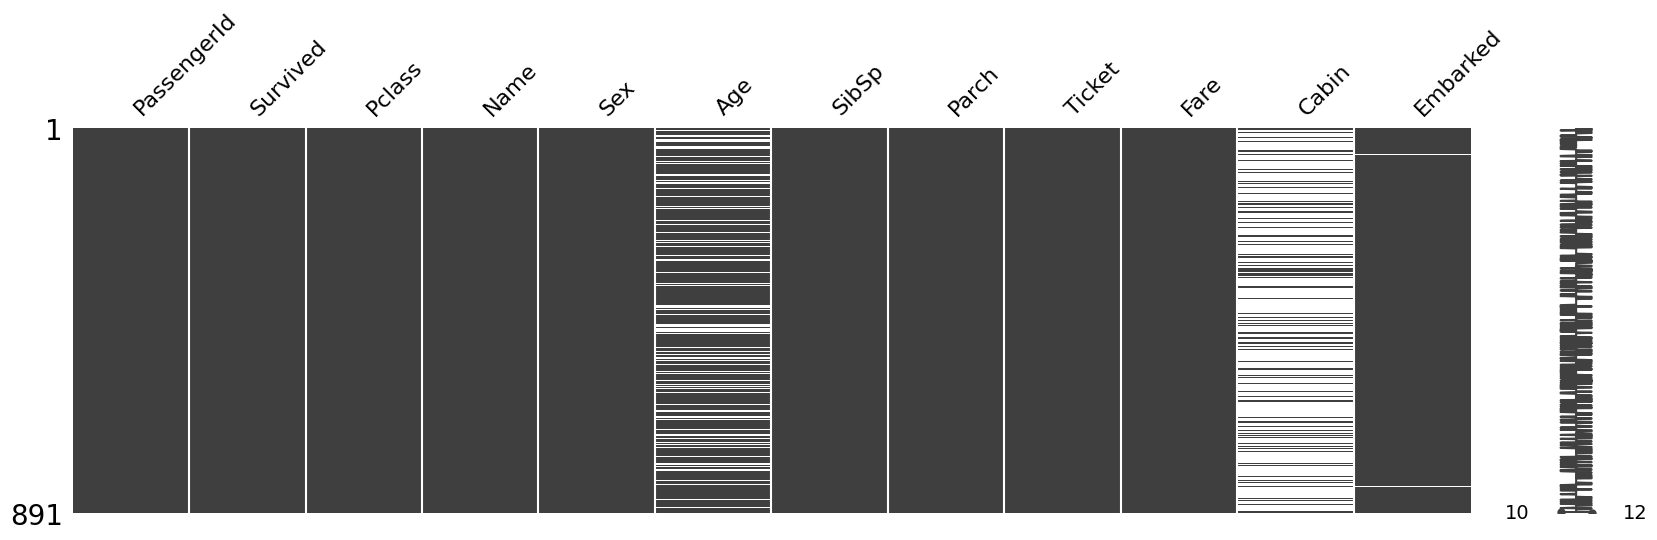

In [885]:
missingno.matrix(titanic, figsize = (20,5))

Ages, cabin, and embarked columns have missing data. 

In [886]:
titanic['Survived']=titanic['Survived'].replace(0,'No').replace(1,'Yes')
titanic['Embarked']=titanic['Embarked'].replace('S','Southampton').replace('C','Cherbourg').replace('Q','Queenstown')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
5,6,No,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Queenstown
6,7,No,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,Southampton
7,8,No,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,Southampton
8,9,Yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,Southampton
9,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,Cherbourg


Survived entries have replaced with yes or no and embarked entries have been replaced with city names

In [887]:
def get_countplot(df=None,y=str,figsize=tuple,hue=None):
    fig = plt.figure(figsize=figsize)
    sns.countplot(y=y,hue=hue, data=df)

def plot_range(df=None, y=str, bins=tuple,figsize=tuple,secondary=None):
    fig = plt.figure(figsize=figsize)
    df[y + "_range"] = pd.cut(df[y], bins=bins)
    sns.countplot(y=y + "_range",hue=secondary, data=df)

def get_histplot(df=None,x=str,figsize=tuple):
    fig = plt.figure(figsize=figsize)
    sns.histplot(df, x=x)

def get_violinplot(df=None,x=str,y=str):
    sns.violinplot(x=x,y=y,data=df)  



male      577
female    314
Name: Sex, dtype: int64

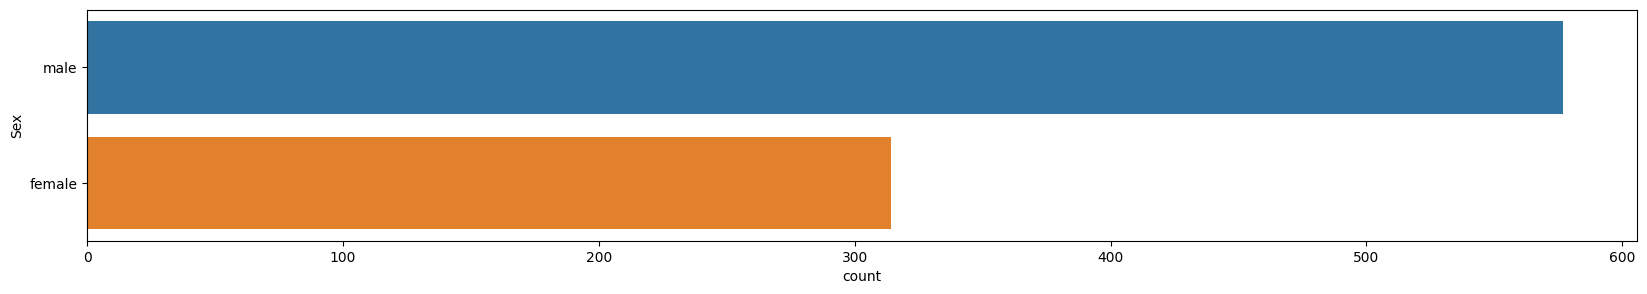

In [888]:
get_countplot(titanic,"Sex",(20,3))
titanic.Sex.value_counts()


Nearly double the amount of males were on the ship than females

No     549
Yes    342
Name: Survived, dtype: int64

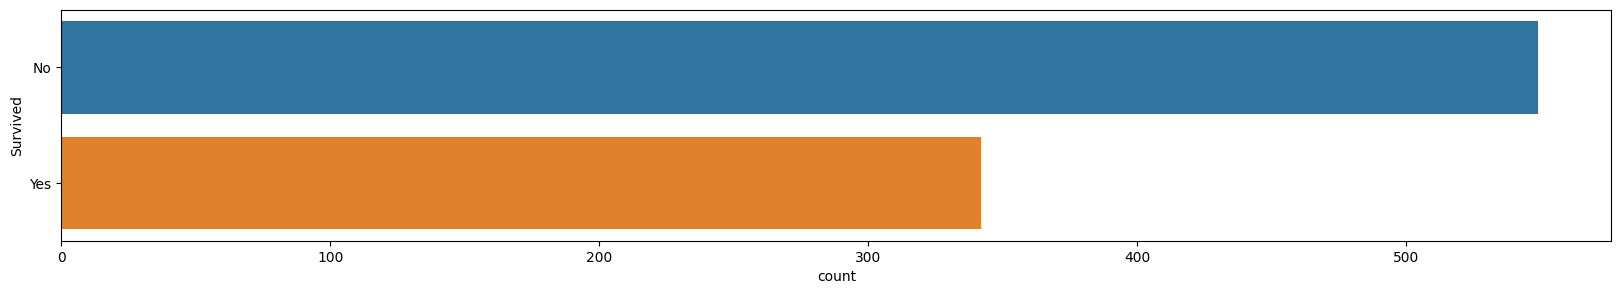

In [889]:
get_countplot(titanic,"Survived",(20,3))
titanic.Survived.value_counts()

Approximatly 60% of people did not survive

3    491
1    216
2    184
Name: Pclass, dtype: int64

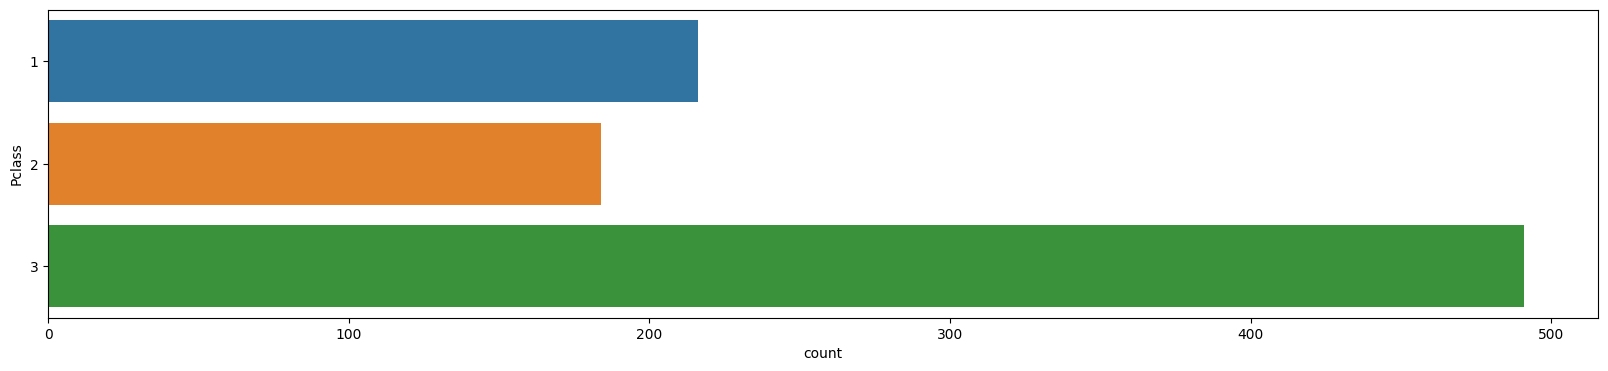

In [890]:
get_countplot(titanic,"Pclass",(20,4))
titanic.Pclass.value_counts()


More people were in third class than the upper two

(20, 30]    230
(30, 40]    155
(10, 20]    115
(40, 50]     86
(0, 10]      64
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Age_range, dtype: int64

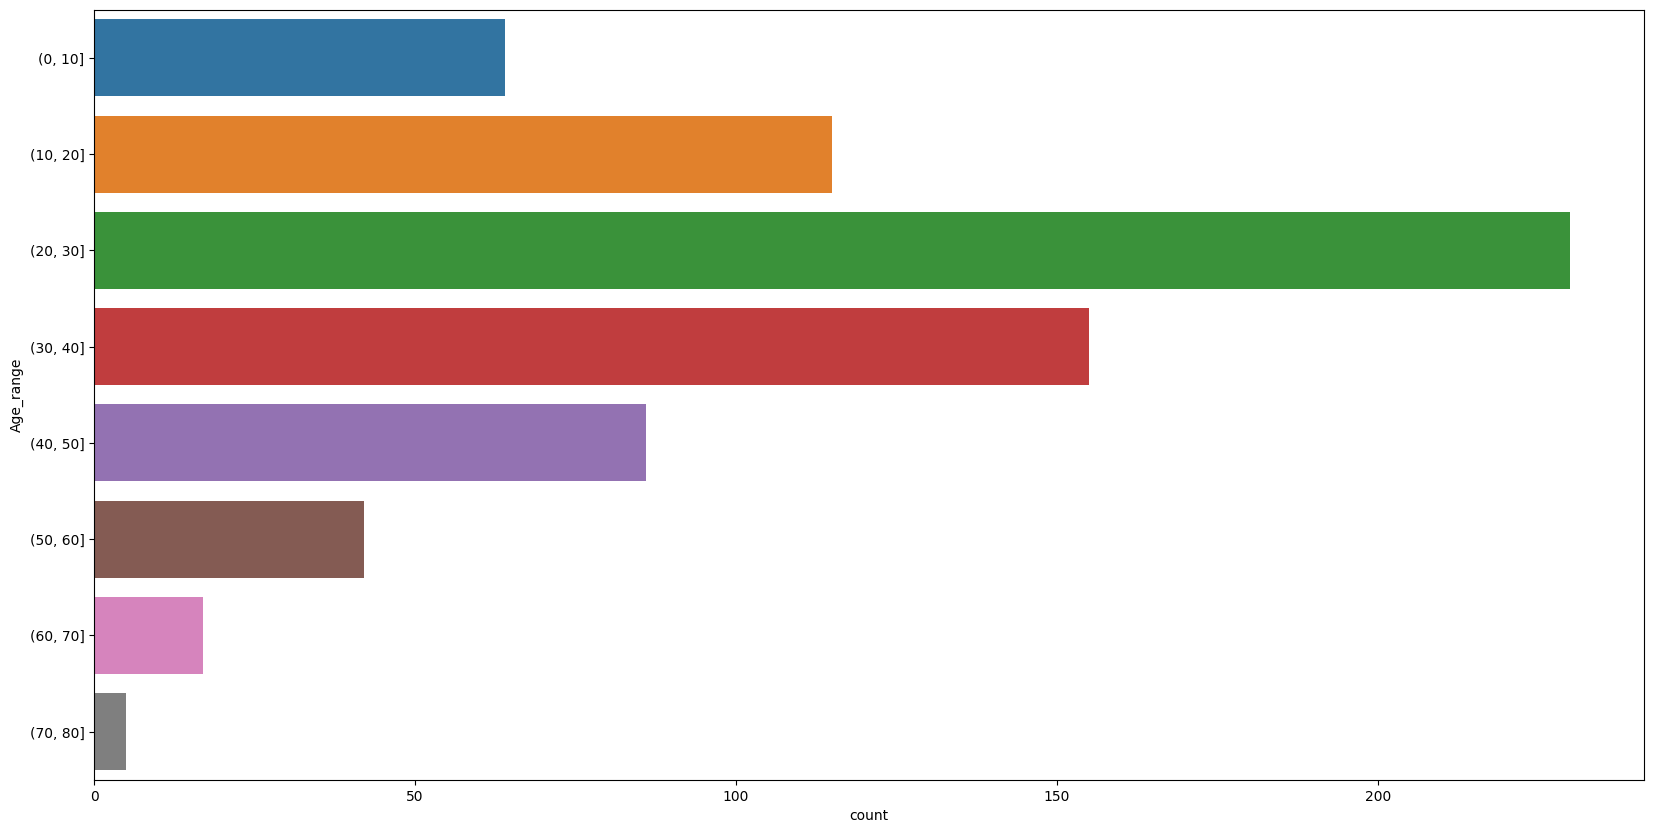

In [891]:
plot_range(titanic,'Age',range(0,90,10),(20,10))
titanic.Age_range.value_counts()



<AxesSubplot: xlabel='Age', ylabel='Count'>

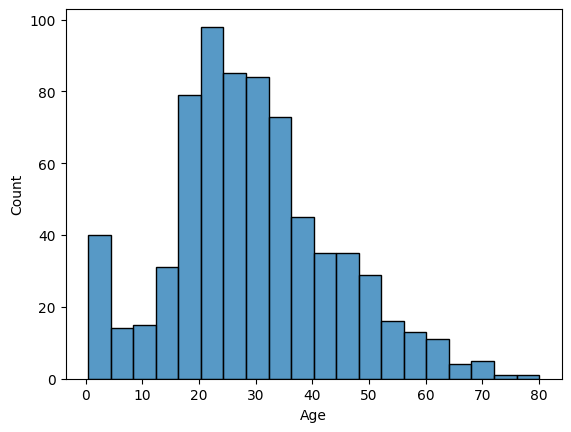

In [892]:
sns.histplot(data=titanic, x="Age")

The 20-30 age range is the largest

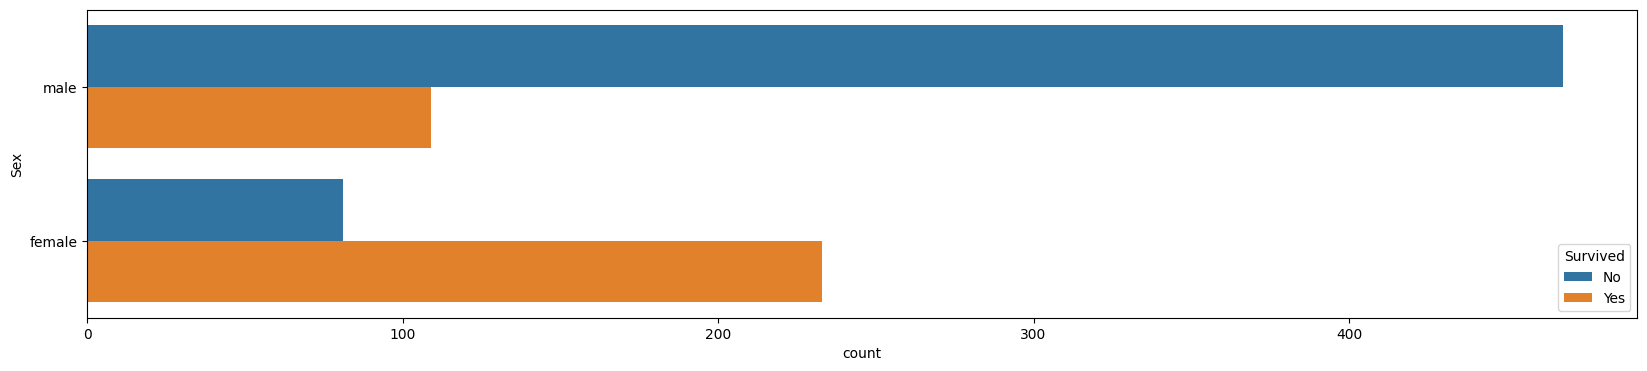

In [893]:
get_countplot(titanic,"Sex",(20,4),'Survived')

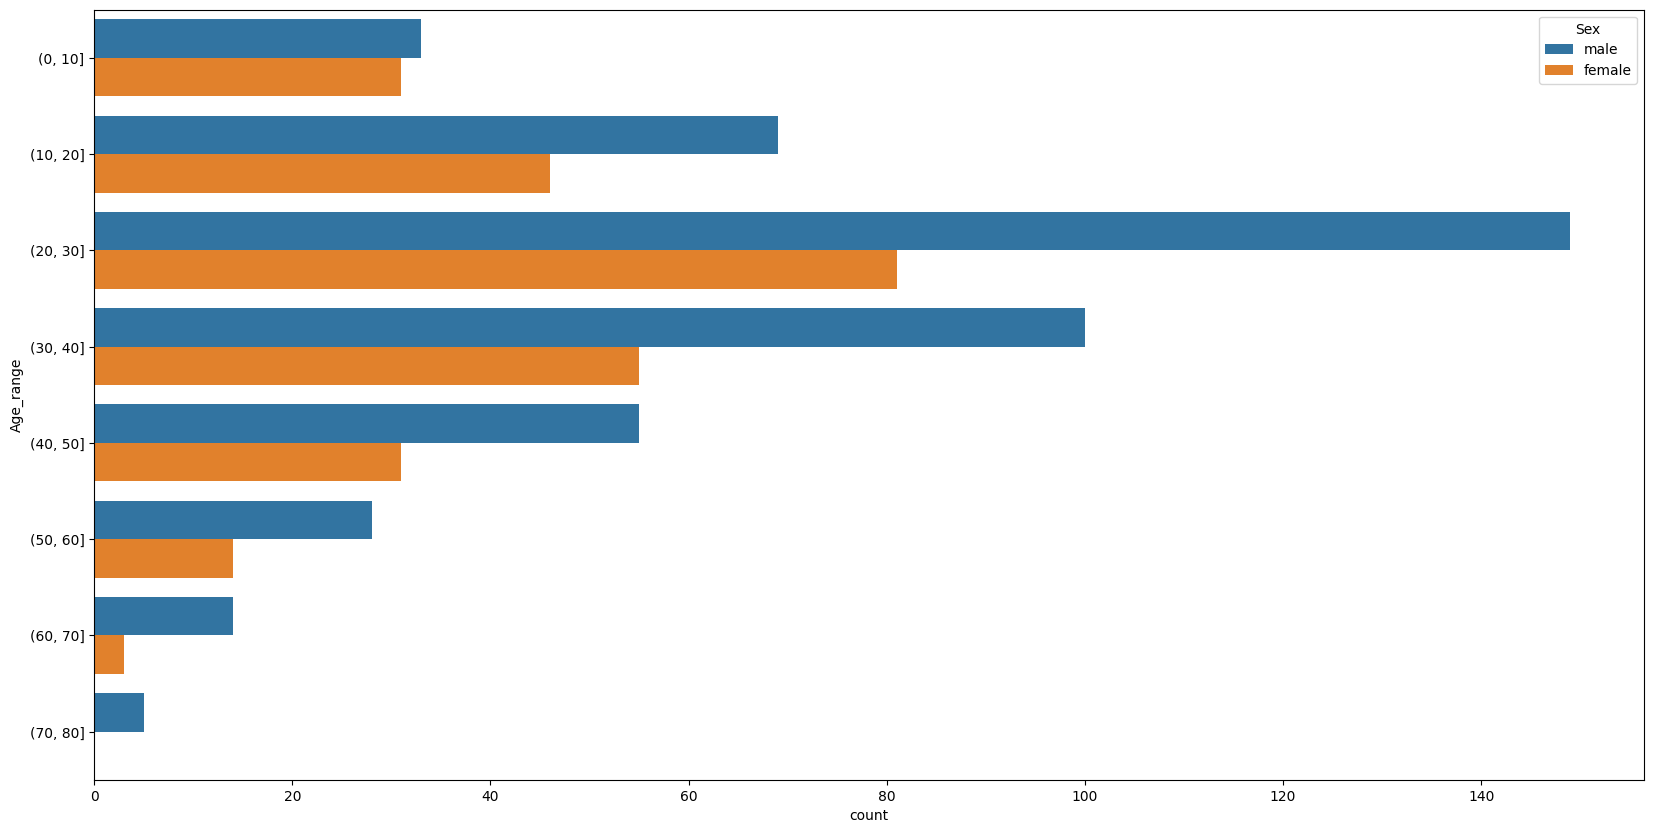

In [894]:
plot_range(titanic,'Age',range(0,90,10),(20,10),'Sex')

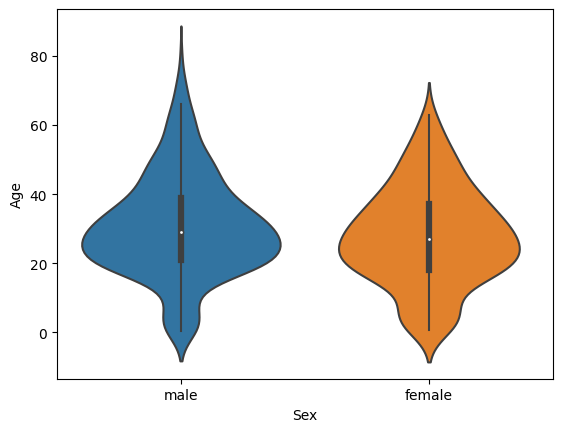

In [895]:
def get_violinplot(df=None,x=str,y=str):
    sns.violinplot(x=x,y=y,data=df)  
#age verses sex
get_violinplot(titanic,'Sex','Age')

The majority of males did not survive but the majority of females did.

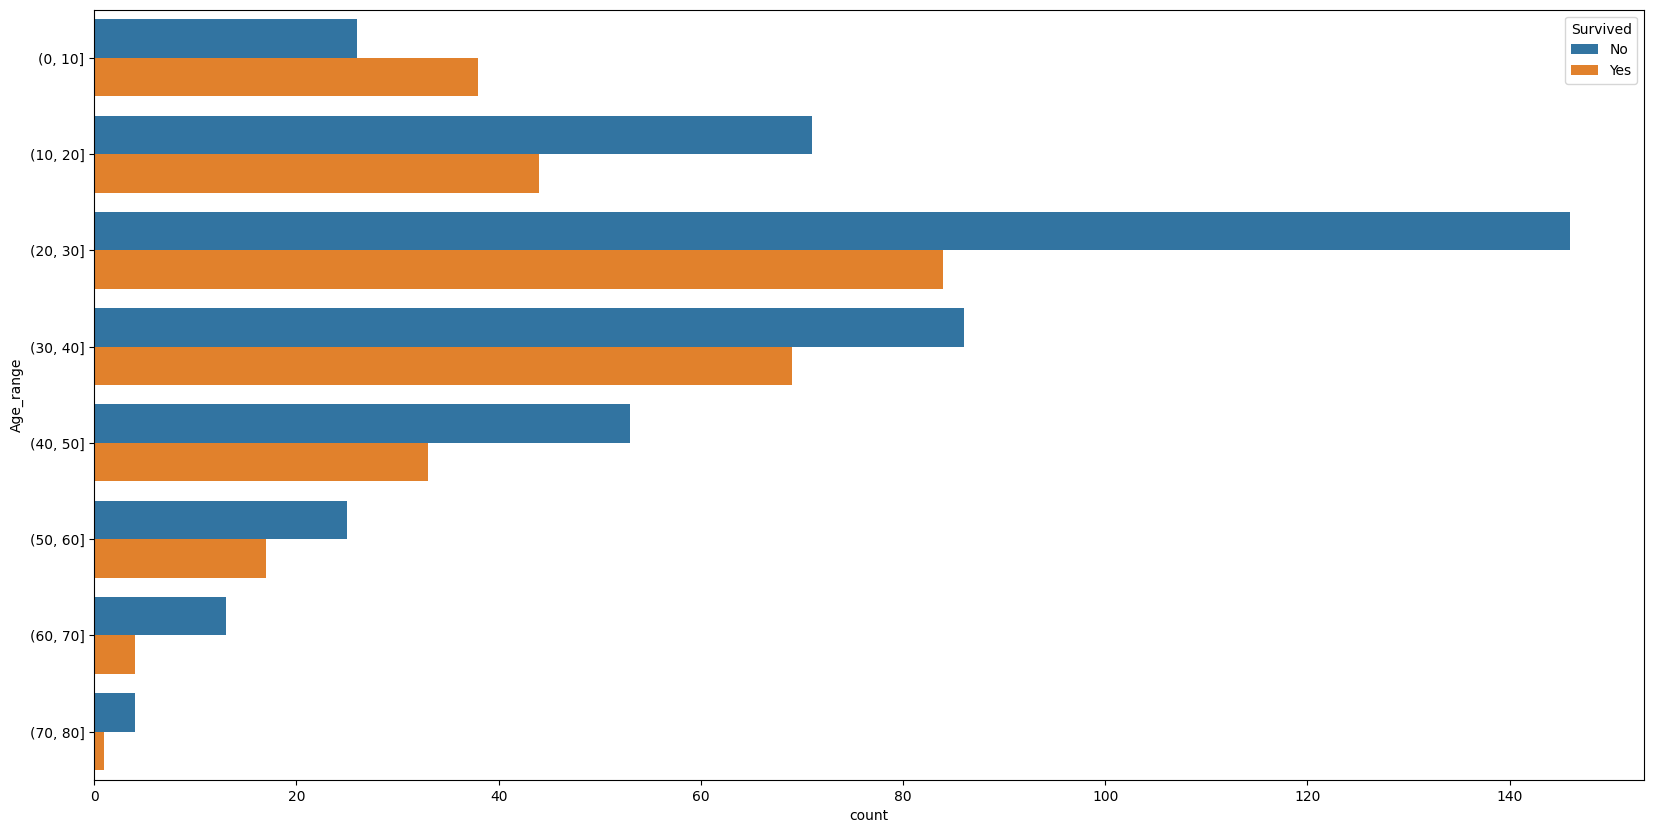

In [896]:
plot_range(titanic,'Age',range(0,90,10),(20,10),'Survived')

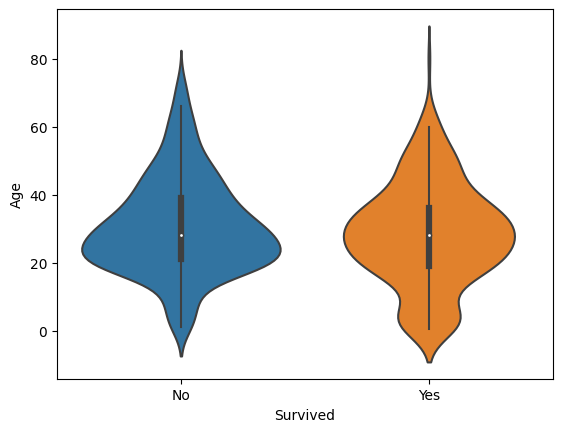

In [897]:
get_violinplot(titanic,'Survived','Age')

You are most likely to not survives in ages between 20-30

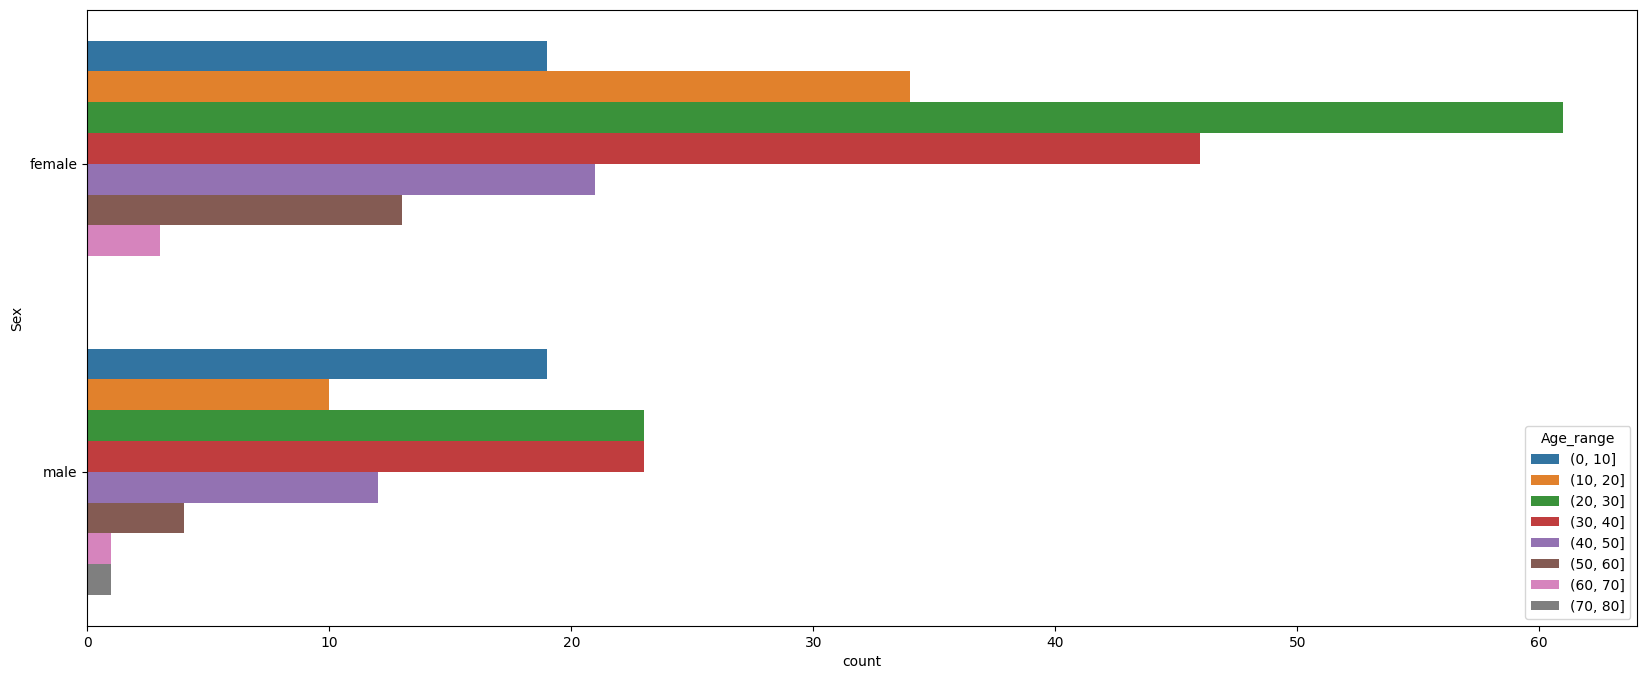

In [898]:
mask = titanic["Survived"] == 'Yes'
survivors = titanic[mask]
get_countplot(survivors,"Sex",(20,8),'Age_range')

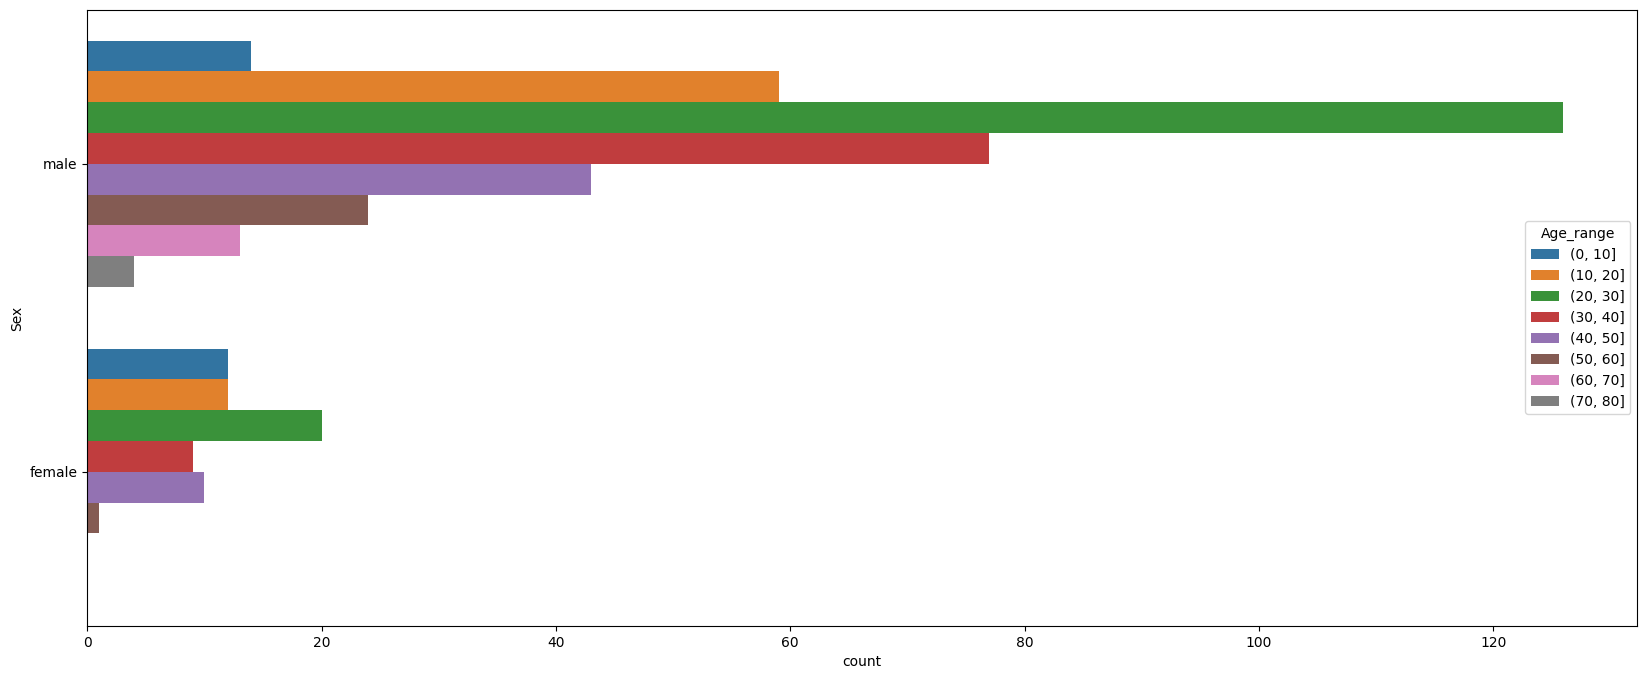

In [899]:
mask = titanic["Survived"] == 'No'
non_survivors = titanic[mask]
get_countplot(non_survivors,"Sex",(20,8),'Age_range')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


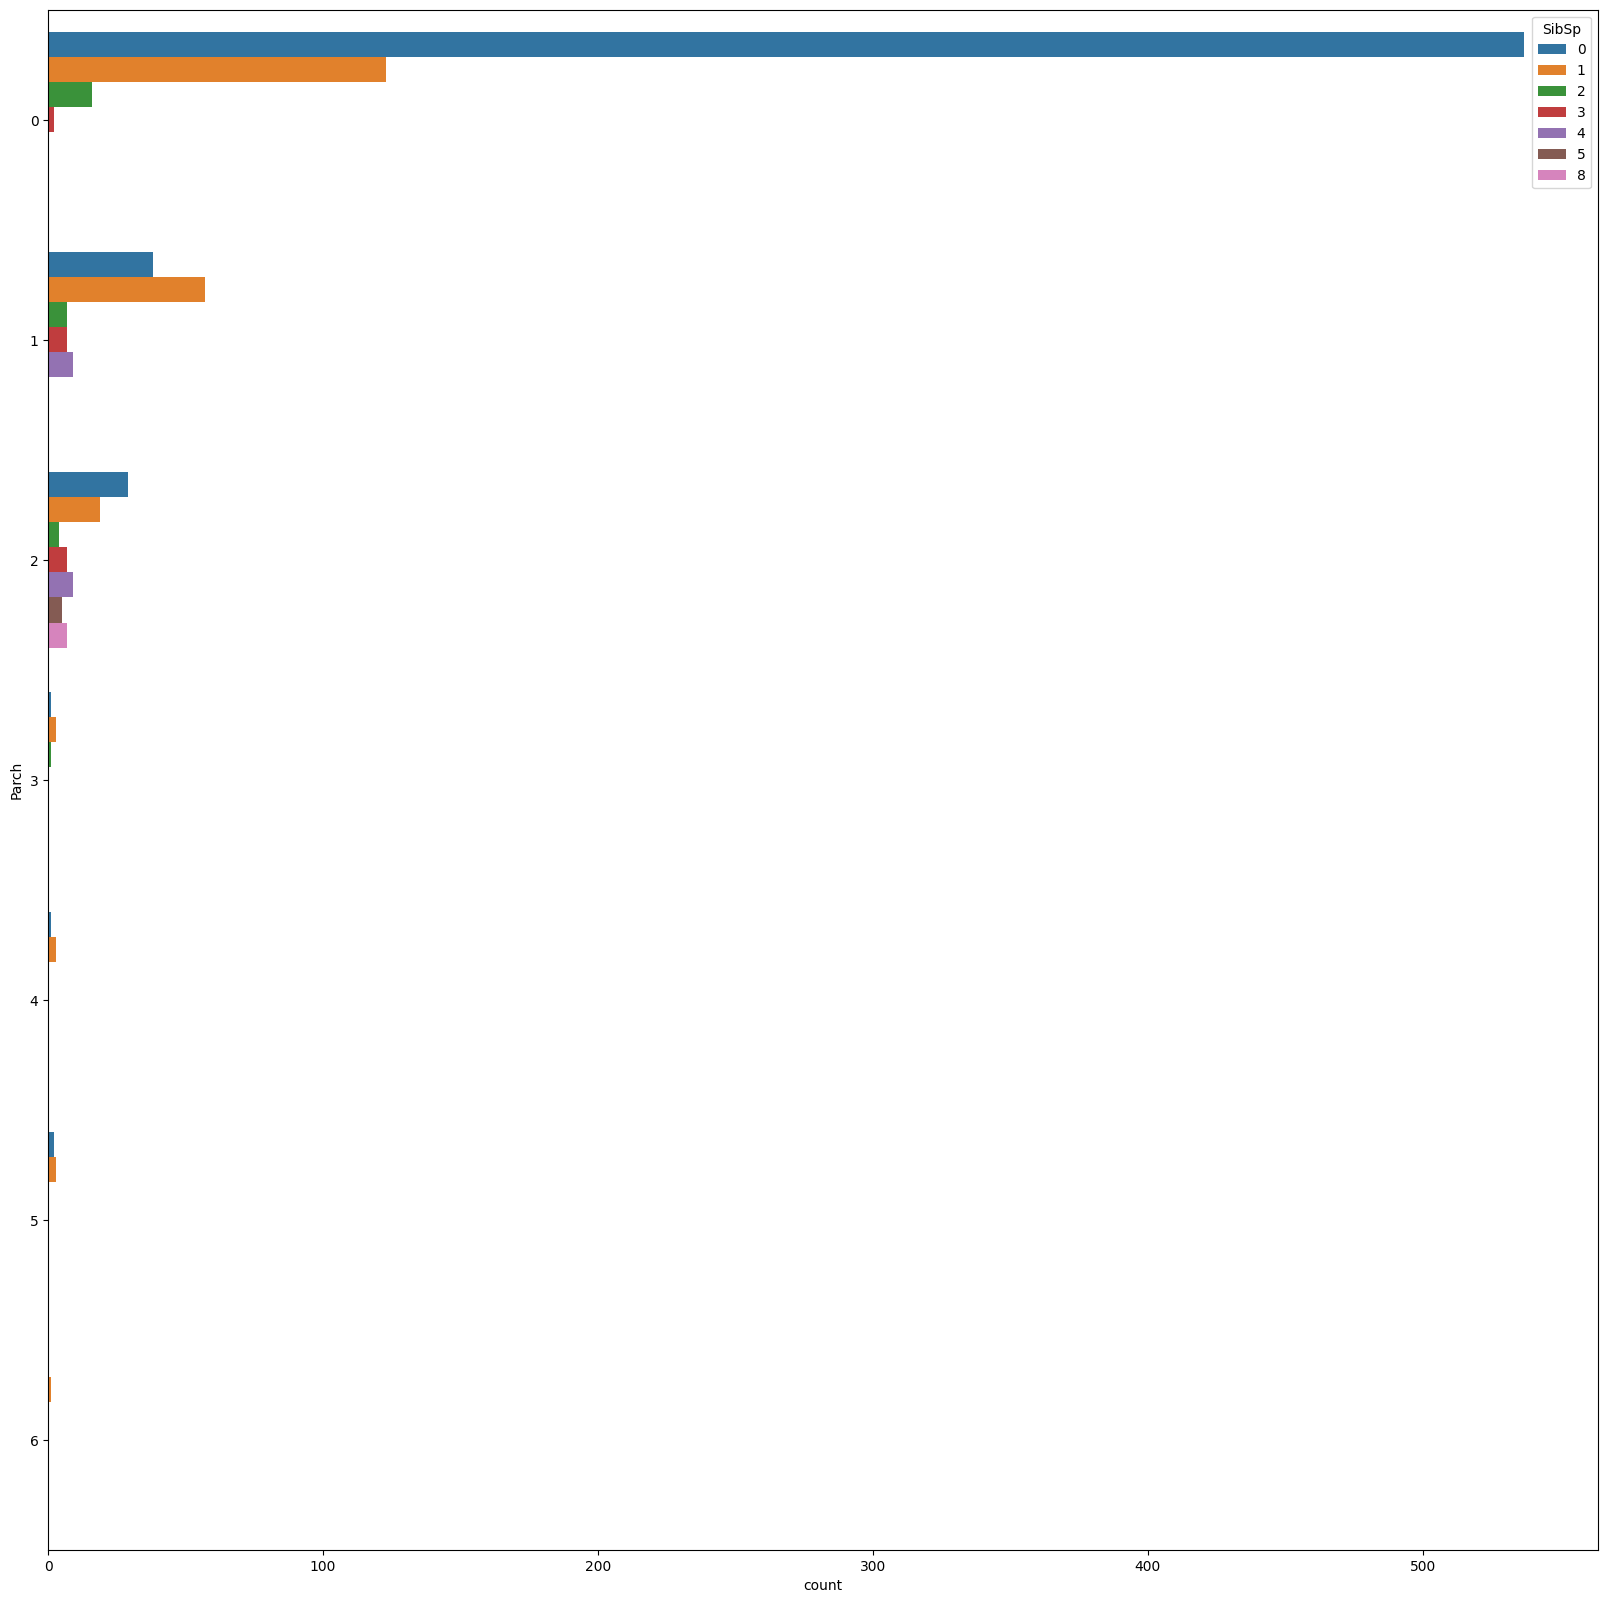

In [900]:
get_countplot(titanic,"Parch",(20,20),'SibSp')
print(titanic.SibSp.value_counts())
print(titanic.Parch.value_counts())

Most people travelled alone followed by people travelling with a sibling or spouse. A smaller amount of people travelled as a family

<AxesSubplot: xlabel='Fare', ylabel='Count'>

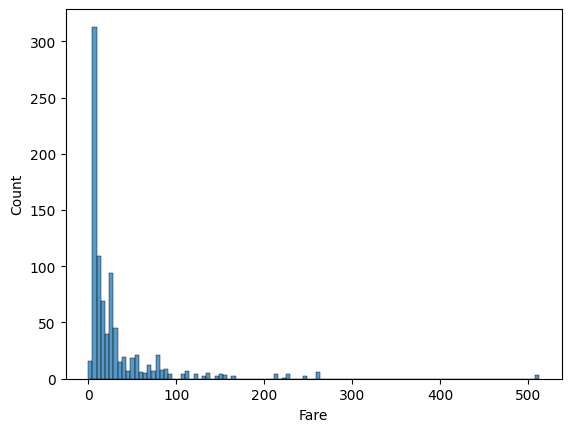

In [901]:
sns.histplot(data=titanic, x="Fare")

Most people bought a cheaper ticket. The most expensive is over £500

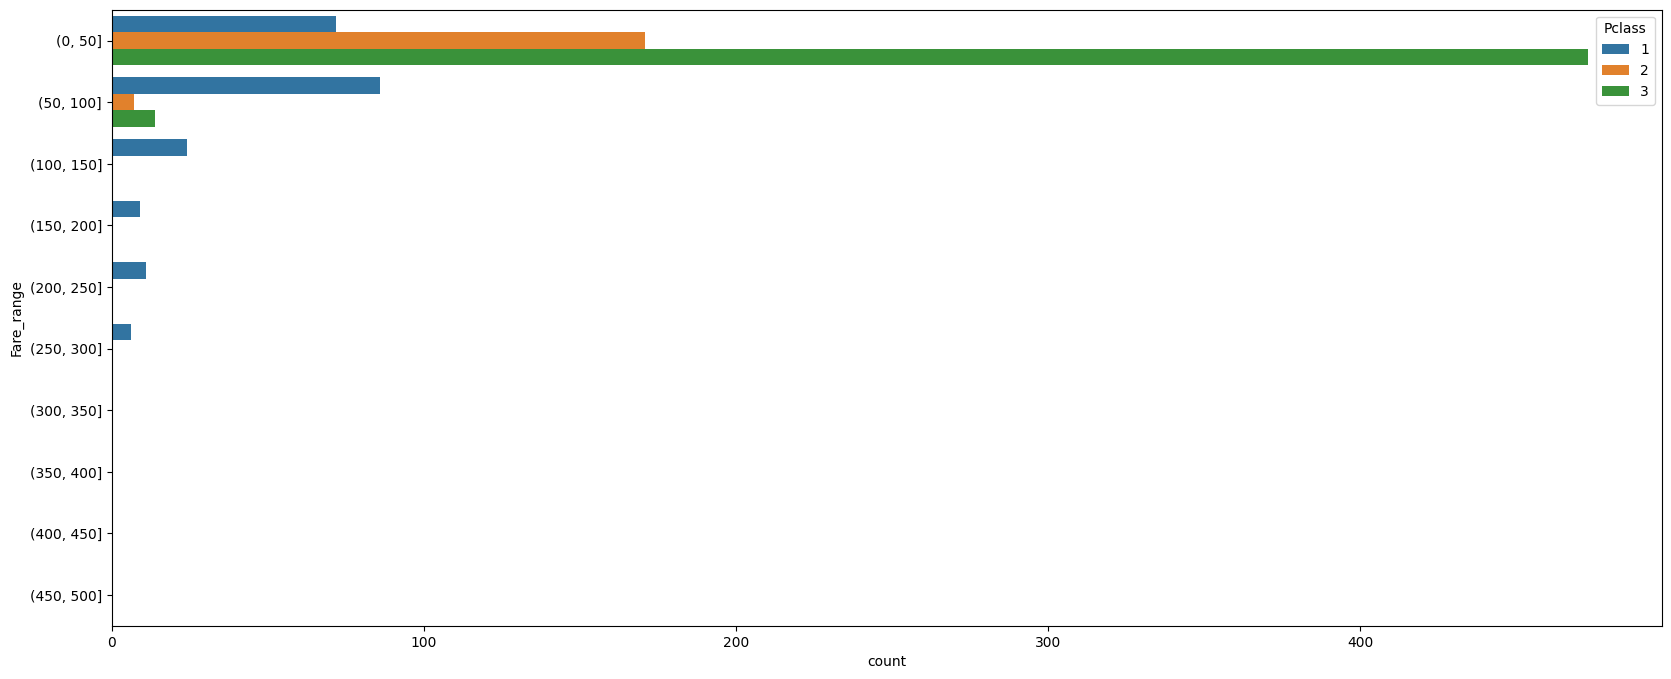

In [902]:
plot_range(titanic,'Fare',range(0,550,50),(20,8),'Pclass')  #   fare and class count

([<matplotlib.axis.XTick at 0x20f5cb8a1f0>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

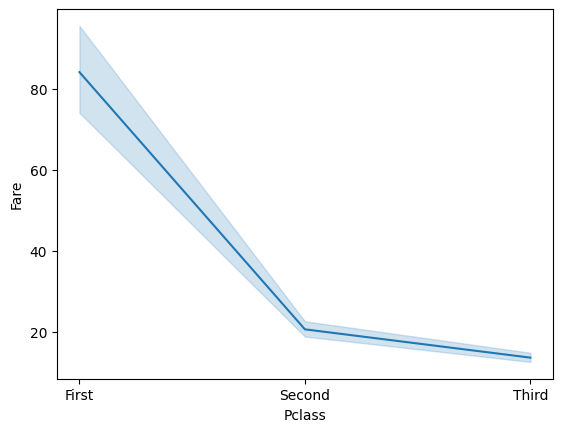

In [903]:
sns.lineplot(x="Pclass", y="Fare", data=titanic)    #Fare and class
tick_locs, tick_labels = plt.xticks()

# Set the tick labels to the new labels
plt.xticks([1,2,3], ["First", "Second", "Third"])

Most people bought a third class ticket. This ticket is the cheapest of the three classes. The range of the costs of the ticket is low. The first class ticket is most expensive and the least number of people bought the ticket. The range of costs of this ticket is the widest.

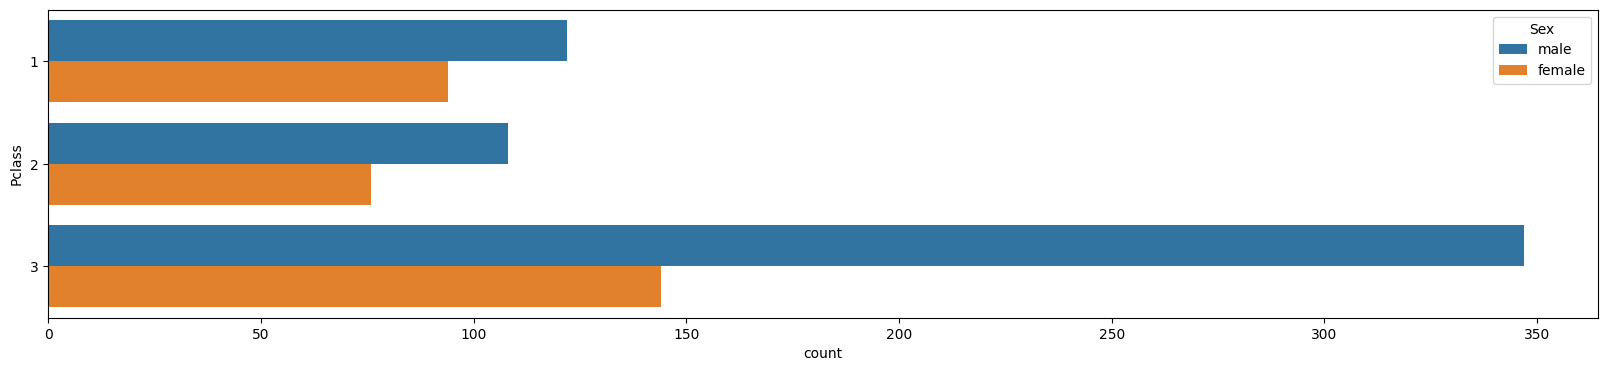

In [904]:
get_countplot(titanic,"Pclass",(20,4),'Sex')    #count class and sex 

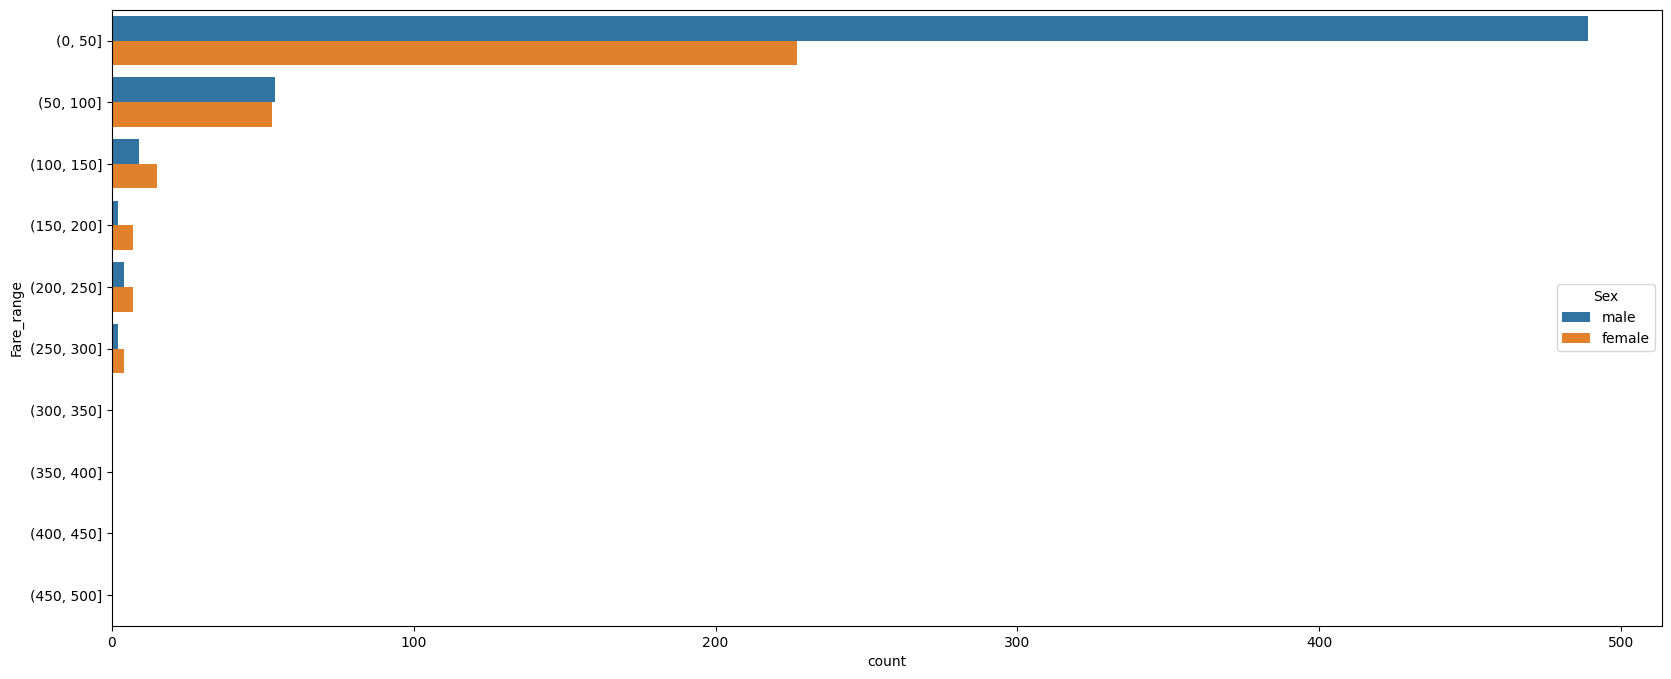

In [905]:
plot_range(titanic,'Fare',range(0,550,50),(20,8),'Sex') # Fare and sex count

A higher proportion of males to females bought lower class tickets than upper class. More Females bought the more expensive tickets.

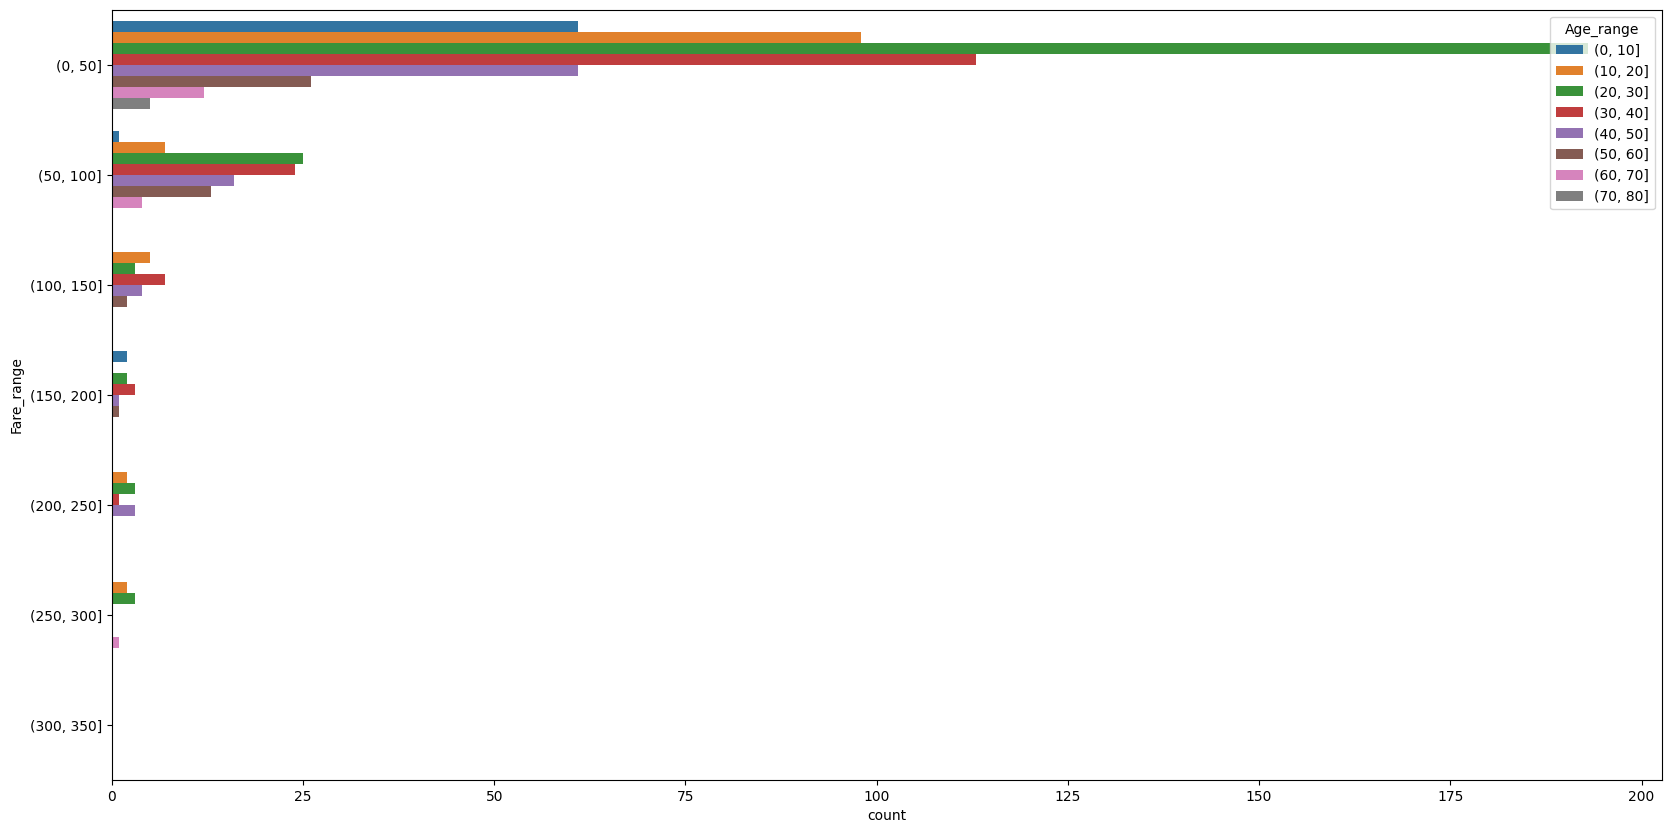

In [906]:
plot_range(titanic,'Fare',range(0,400,50),(20,10),'Age_range')

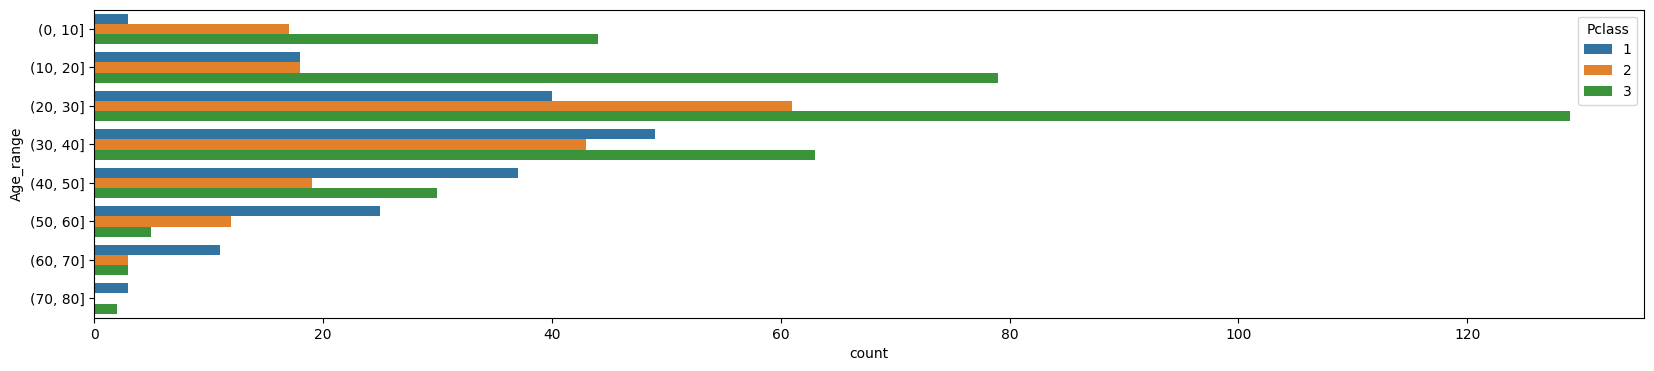

In [907]:
get_countplot(titanic,"Age_range",(20,4),'Pclass')

The likelihood of a person buying a more expensive upper class ticket increases with age. The most common age range in third and second class is 20-30. The most common age range in first class is 30-40. 

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

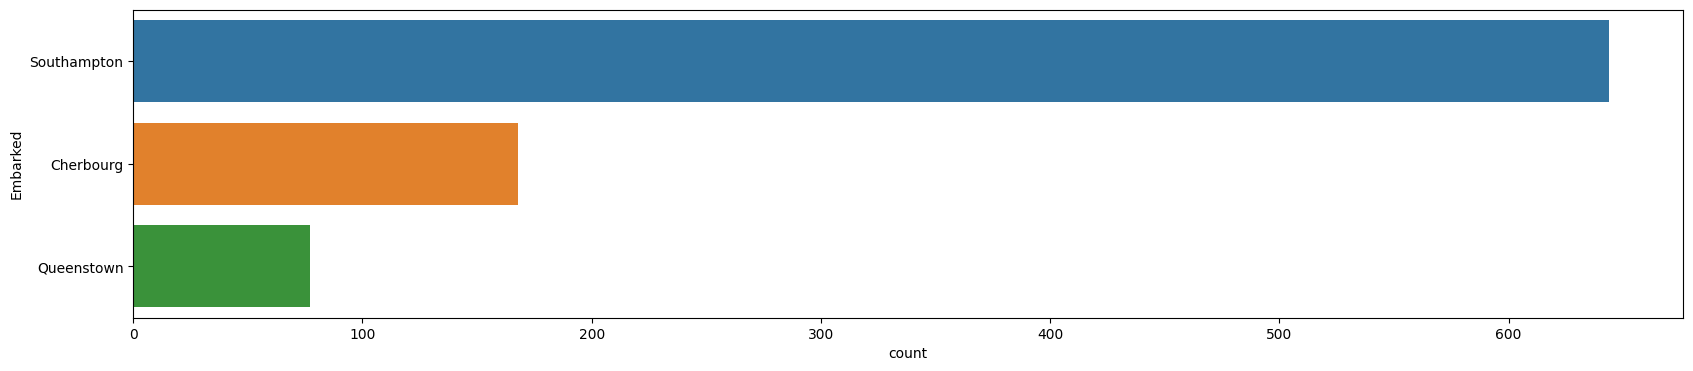

In [908]:
get_countplot(titanic,"Embarked",(20,4))  #Cherbourg, Queenstown, and Southampton
titanic.Embarked.value_counts()


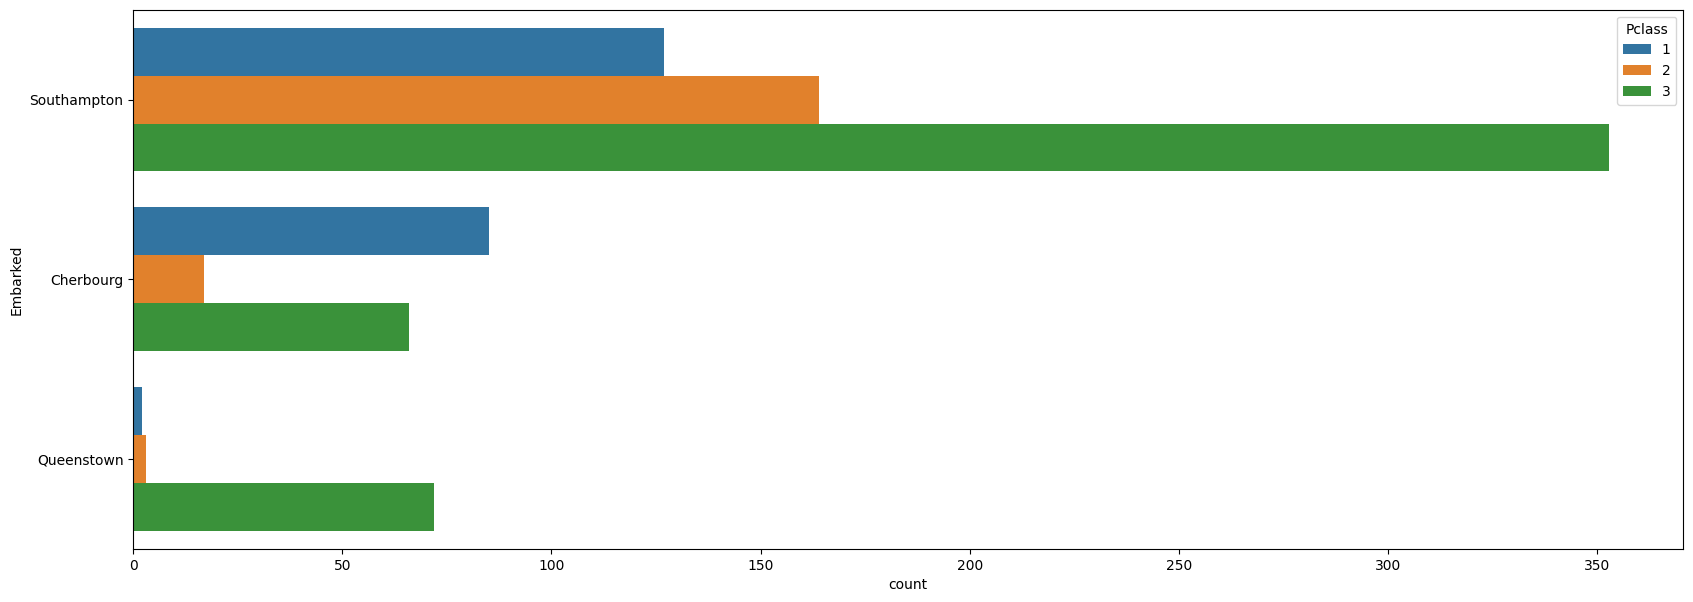

In [911]:
get_countplot(titanic,"Embarked",(20,7),'Pclass')

The Majority of people embarked at southampton